In [6]:
# One of the most widely used formats for astronomical images is the Flexible Image Transport System. In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array.
# FITS files also have headers which store metadata about the image.
# FITS files are a standard format and astronomers have developed many libraries (in many programming languages) that can read and write FITS files. We're going to use the Astropy module.
# The following code shows how we can open a FITS file and print out its header information:

from astropy.io import fits
hdul = fits.open('Pulsarfits1000/0000.fits')
print(hdul.info())

Filename: Pulsarfits1000/0000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (200, 200)   float32   
None


In [7]:
#Reading in FITS files

# Opening a FITS file in Astropy returns a HDU (Header/Data Unit) list. Each HDU stores headers and (optionally) image data.
# The header contains metadata about the HDU object, e.g. its dimensions and data type. Every HDU can contain image data. The first HDU is called the primary HDU.
# If we want to access individual HDUs, we can index the HDU list object returned by fits.open. The image data can be accessed using the data attribute:

from astropy.io import fits
hdl = fits.open('Pulsarfits1000/0000.fits')
d = hdl[0].data

print(d.shape)

# The image data is conveniently stored in a NumPy array, so we can operate on it directly. This example prints the dimensions of the image in the primary HDU.

(200, 200)


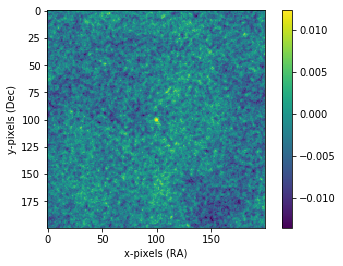

In [8]:
#Visualizing FITS files

# You often want to visualise the image data stored in FITS files. We can do this using the plotting library matplotlib.
# This example creates a 2D plot from the previous FITS image:

from astropy.io import fits
import matplotlib.pyplot as plt

hdl = fits.open('Pulsarfits5mean/image0.fits')
d = hdl[0].data

plt.imshow(d, cmap = plt.cm.viridis)
plt.xlabel('x-pixels (RA)')
plt.ylabel('y-pixels (Dec)')
plt.colorbar()
plt.show()

(101, 100)


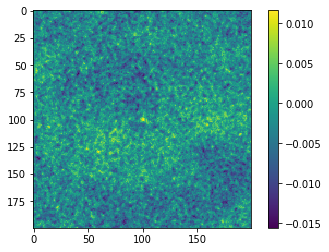

In [9]:
## Assignment Read a FITS file

# Write a load_fits function that loads in a FITS file and finds the position of the brightest pixel (i.e. the maximum value) in its image data. To make this function work for arbitrary files, pass the name of the FITS file as an argument to the function.
# Using the file image0.fits from the previous examples, your program should work like this:

# >>> load_fits('image0.fits')
# (100, 100)

# The brightest pixel in this image is exactly in the centre of the array, as you can check visually by plotting it:

# For the file image1.fits, the maximum is shifted by 1 pixel to the left and your function should produce the following output:

# >>> load_fits('image1.fits')
# (101, 100)

# The FITS files for this example all contain image data of the same pulsar but that does not necessarily mean that it is visible in all of these images. When you take a look at the file image2.fits for instance, your function should be able to tell you that the brightest pixel is somewhere completely different:

# >>> load_fits('image2.fits')
# (14, 125)

# If you want to plot the arrays out for yourself, keep in mind that any additional code in your script needs to go into a if __name__ == '__main__' statement to be safely ignored by the automarker.
# Hint
# If you are unsure how to do this problem, take a look at NumPy's argmax function. A short way of solving this problem is to make this function work on a 2D array.


from astropy.io import fits
import numpy as np


#load_fitsfile function is over here
def load_fitsfile(file):
    hdulist = fits.open(file)
    d = hdulist[0].data
    
    a = np.argmax(d)
    maxPos = np.unravel_index(a, d.shape)
    
    return maxPos


#  tester code over here

if __name__== '__main__':
    
    val = load_fitsfile('Pulsarfits5mean/image4.fits')
    print(val)
    
#   Result visuals

    from astropy.io import fits
    import matplotlib.pyplot as plt
    
    hdulist = fits.open('Pulsarfits5mean/image4.fits')
    d = hdulist[0].data
    
    plt.imshow(d.T, cmap = plt.cm.viridis)
    plt.colorbar()
    plt.show()

In [10]:
##Reading an array of files
from astropy.io import fits
import numpy as np

#Load_fitsfiles function over here
def load_fitsfiles(files):
    f = len(files)
    
    if f>0:
        
        hdulist = fits.open(files[0])
        d = hdulist[0].data
        a = np.argmax(d)
        maxPos = np.unravel_index(a, d.shape)
        hdulist.close()
        
        for i in range (1,f):
            hdulist = fits.open(files[i])
            d = hdulist[0].data
            hdulist.close()
            
            a = np.argmax(d)
            maxPos += np.unravel_index(a, d.shape)
            
            
        
    return maxPos


#  tester code over here

if __name__== '__main__':
    
    val = load_fitsfiles(['Pulsarfits5mean/image0.fits','Pulsarfits5mean/image1.fits','Pulsarfits5mean/image2.fits','Pulsarfits5mean/image3.fits','Pulsarfits5mean/image4.fits'])
    print(val)
    


(100, 100, 101, 100, 14, 125, 4, 55, 101, 100)


(100, 100)


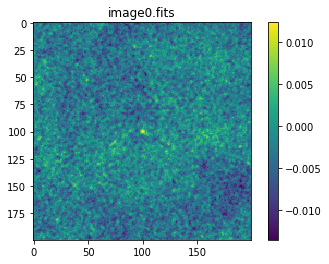

(101, 100)


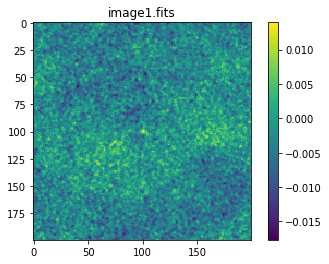

(14, 125)


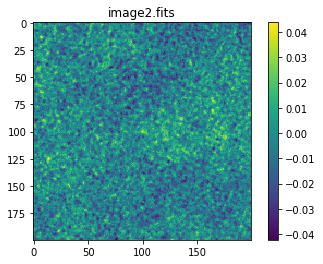

(4, 55)


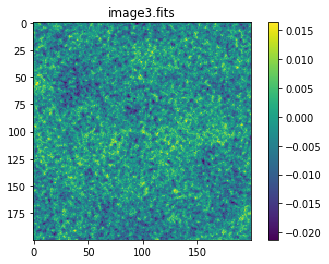

(101, 100)


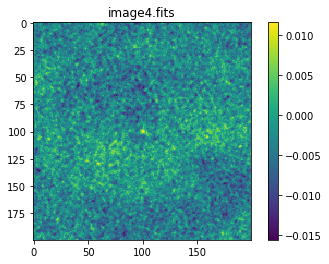

In [11]:
#   Result visuals
from astropy.io import fits
import matplotlib.pyplot as plt
    
for i in range(0,5):
    hdulist = fits.open('Pulsarfits5mean/image%d.fits' %i)
    d = hdulist[0].data
    val = load_fitsfile('Pulsarfits5mean/image%d.fits' %i)
    plt.title("image%d.fits" %i )
    print(val)
    plt.imshow(d.T, cmap=plt.cm.viridis)
    plt.colorbar()
    plt.show()

0.017356586332122486


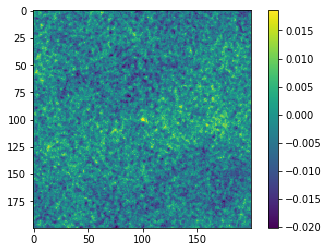

In [12]:
# In this set of activities we've covered basic file reading and data manipulation techniques. You have learned how to load data and store it in either Python lists or NumPy arrays, and how to perform basic operations on both types of data.
# The examples contained calculations of the mean of one- and two-dimensional datasets in a variety of ways.
# We moved on to FITS files and how to load FITS files, visualise the image data, and extract specific information from the image.
# Now we will put everything together and round up this module by calculating the mean of a stack of FITS files. Each individual file may or may not have a detected pulsar, but in the final stack you should be able to see a clear detection.


# Write a mean_fits function that takes a list of FITS files as an argument, reads them in, and returns the mean image data of the FITS files. All the images have the same dimensions and your calculated mean array should match those dimensions.
# Your function should be able to process an arbitrary number of files. If you're unsure how to do that, take a look at the sample solutions to the previous problems.
# The mean stack of these files will be a large 200 x 200 array, so we will only look at the central value of your returned array, which is where we expect the pulsar to be.
# For the files image0.fits, image1.fits and image2.fits, your program should work like this:

# >>> mean_fits(['image0.fits', 'image1.fits', 'image2.fits'])[100, 100]
# 0.017356586332122486

# We can access the mean at x=100, y=100 using the index operator right after the function call, as we expect its return value to be an array. The central mean value for the files image0.fits, image1.fits, and image3.fits should be:

# >>> mean_fits(['image0.fits', 'image1.fits', 'image3.fits'])[100, 100]
# 0.01006323037048181

# Using all the FITS files provided (images 0 to 4), your program should work like this:

# >>> mean_fits(['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits', 'image4.fits'])[100, 100]
# 0.014150320738554

from astropy.io import fits
import numpy as np
# Write your mean_fits function here:
def mean_fits(filenames):
   n=len(filenames)
   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
        
      mean = data / n
      return mean
if __name__ == '__main__':
  
  # Test your function with examples from the question
  data  = mean_fits(['Pulsarfits5mean/image0.fits', 'Pulsarfits5mean/image1.fits', 'Pulsarfits5mean/image2.fits'])
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()



# data  = mean_fits(['Pulsarfits5mean/image0.fits', 'Pulsarfits5mean/image1.fits', 'Pulsarfits5mean/image2.fits'])
# Congratulations, you've finished this set of activities.
# If you've still got questions about any of the content, head to the forums to discuss with your fellow learners.
# Now head back to Coursera for the next lecture.

0.031536996


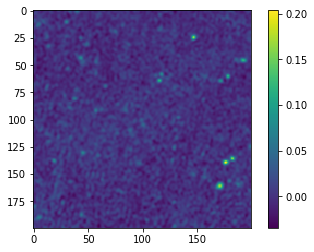

In [13]:

# For a dataset of 1000 images
from astropy.io import fits
import numpy as np
# Write your mean_fits function here:
def mean_fits(filenames):
   n=len(filenames)
   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
        
      mean = data / n
      return mean
    
# Driver function
    
if __name__ == '__main__':
  
  # Test your function with examples from the question
  

  t = []
  t.append('Pulsarfits1000/0000.fits')
  for i in range(1,10):
      t.append('Pulsarfits1000/000%d.fits' %i)
  
  for j in range(11,100):
      t.append('Pulsarfits1000/00%d.fits' %j)
  
  for k in range(101,1000):
      t.append('Pulsarfits1000/0%d.fits' %k)
  
  data = mean_fits(t)
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()
    


0.024822164


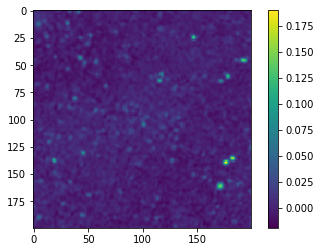

In [25]:

# For a dataset of 7330 images

from astropy.io import fits
import numpy as np
# Write your mean_fits function here:
def mean_fits(filenames):
   n=len(filenames)
   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
        
      mean = data / n
      return mean
    
# Driver function
    
if __name__ == '__main__':
  
  # Test your function with examples from the question
  

  t = []
  t.append('Pulsarfits7330/0000.fits')
  for i in range(1,7330):
      if ((i>1) and (i<10)):
          t.append('Pulsarfits7330/000%d.fits' %i)
      elif ((i>11) and (i<100)):
          t.append('Pulsarfits7330/00%d.fits' %i)
      elif ((i>101) and (i<1000)):
          t.append('Pulsarfits7330/0%d.fits' %i)
      elif i>1001:
          t.append('Pulsarfits7330/%d.fits' %i)
        
  data = mean_fits(t)
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()
    

0.0004026278


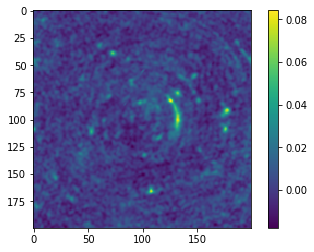

In [7]:
# For a dataset of 9587 images

from astropy.io import fits
import numpy as np
# Write your mean_fits function here:
def mean_fits(filenames):
   n=len(filenames)
   if n>0:
      hdulist = fits.open(filenames[0])
      data = hdulist[0].data  
      hdulist.close()
      
      for i in range(1,n):
        hdulist = fits.open(filenames[i])
        data+= hdulist[0].data
        hdulist.close()
        
      mean = data / n
      return mean
    
# Driver function
    
if __name__ == '__main__':
  
  # Test your function with examples from the question
  
    
  t = []
  t.append('Pulsarfitsrandom_position9587/0000.fits')
  for i in range(1,9587):
      if ((i>1) and (i<10)):
          t.append('Pulsarfitsrandom_position9587/000%d.fits' %i)
      elif ((i>11) and (i<100)):
          t.append('Pulsarfitsrandom_position9587/00%d.fits' %i)
      elif ((i>101) and (i<1000)):
          t.append('Pulsarfitsrandom_position9587/0%d.fits' %i)
      elif i>1001:
          t.append('Pulsarfitsrandom_position9587/%d.fits' %i)
        
#   data = mean_fits(['Pulsarfitsrandom_position9587/{:4d}.fits'.format(str(i)) for i in range(9586)])
  data = mean_fits(t)
  print(data[100, 100])

  # You can also plot the result:
  import matplotlib.pyplot as plt
  plt.imshow(data.T, cmap=plt.cm.viridis)
  plt.colorbar()
  plt.show()
    